# Imports

In [1]:
from orbit_generation.visualize import visualize_static_orbits
from orbit_generation.constants import EM_MU
from orbit_generation.convergence import process_diferential_correction_orbits

In [2]:
import numpy as np
import os
import pandas as pd

# Data

In [3]:
data_path = r"/orbit-generation/data/orbits_fix_1500/EM_N_fix_1500.h5"
experiments_folder = r'../experiments'
experiment_folder = r'../experiments/experiment_4'
experiment_id = int(experiment_folder[-1])

In [4]:
images_folder = os.path.join(experiment_folder, 'images')
generated_data_path = os.path.join(experiment_folder, f'exp{experiment_id}_generated_data.npy')
latent_representations_path = os.path.join(experiment_folder, f'exp{experiment_id}_latent_representations.npy')
latent_space_path = os.path.join(images_folder, f'exp{experiment_id}_latent_space')
initial_conditions_file = os.path.join(experiment_folder, f'exp{experiment_id}_corrected_initial_conditions.npy')
refined_data_file = os.path.join(experiment_folder, f'exp{experiment_id}_propagated_corrected_ICs.npy')
converged_orbits_path = os.path.join(images_folder, f'exp{experiment_id}_converged_orbits')
combined_latent_space_path = os.path.join(images_folder, f'exp{experiment_id}_combined_latent_space')
dynamical_orbits_path = os.path.join(images_folder, f'exp{experiment_id}_refined_orbits.html')

In [5]:
initial_conditions = np.load(initial_conditions_file)
columns= ['id','old_period', 'new_period', 'iterations_convergence','error','pos_x0','pos_y0','pos_z0','vel_x0','vel_y0','vel_z0']
synthetic_orbit_df = pd.DataFrame(initial_conditions, columns=columns)


In [6]:
generated_orbits = np.load(generated_data_path)
generated_orbits.shape

(100, 100, 7)

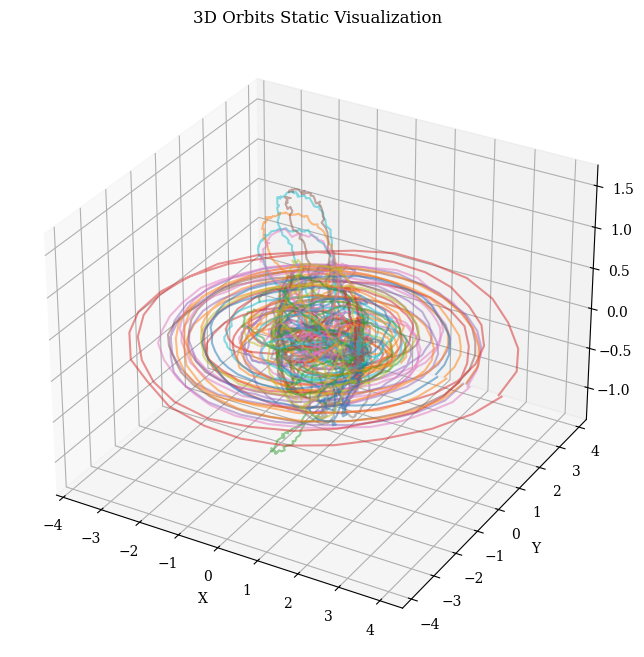

In [7]:
visualize_static_orbits(np.transpose(generated_orbits[:,:,1:], (0, 2, 1)), show_legend=False)

# Convergence


In [8]:
generated_orbits.shape

(100, 100, 7)

In [9]:
converged_orbits, failed_orbits= process_diferential_correction_orbits((generated_orbits), EM_MU)

INFO:orbit_generation.convergence:Processing orbit 1/100


INFO:orbit_generation.convergence:Orbit 0: Success=-1, Norm=7.57806286213824e-15, Iterations=20
INFO:orbit_generation.convergence:Processing orbit 2/100
INFO:orbit_generation.convergence:Orbit 1: Success=1, Norm=5.741018899395959e-13, Iterations=8
INFO:orbit_generation.convergence:Processing orbit 3/100
INFO:orbit_generation.convergence:Orbit 2: Success=-1, Norm=10.793713450221, Iterations=2
INFO:orbit_generation.convergence:Processing orbit 4/100
INFO:orbit_generation.convergence:Orbit 3: Success=1, Norm=4.071039144872833e-11, Iterations=7
INFO:orbit_generation.convergence:Processing orbit 5/100
INFO:orbit_generation.convergence:Orbit 4: Success=1, Norm=5.608834509492877e-10, Iterations=7
INFO:orbit_generation.convergence:Processing orbit 6/100
INFO:orbit_generation.convergence:Orbit 5: Success=-1, Norm=20.319882814186904, Iterations=3
INFO:orbit_generation.convergence:Processing orbit 7/100
INFO:orbit_generation.convergence:Orbit 6: Success=1, Norm=1.3642088052483317e-10, Iterations=

In [10]:
converged_orbits.shape

(60, 100, 7)

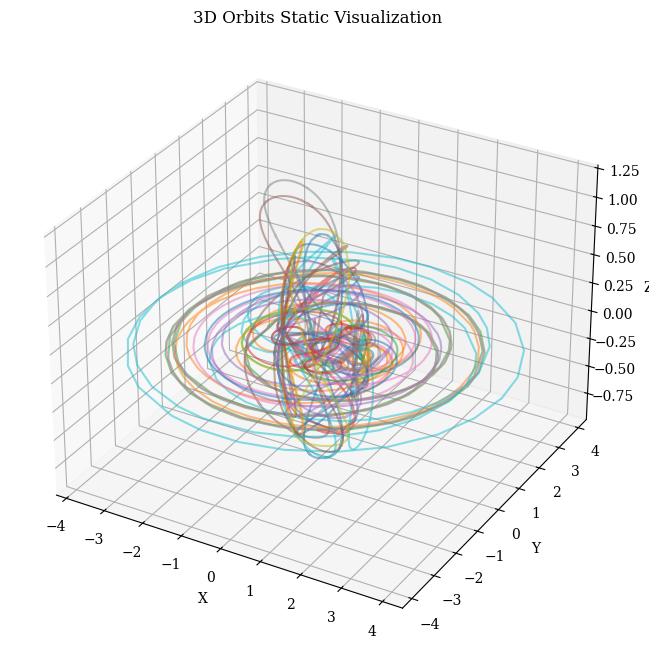

In [11]:
visualize_static_orbits(np.transpose(converged_orbits[:,:,1:], (0, 2, 1)), show_legend=False)

In [13]:
old_refined_orbits = np.load(refined_data_file)
old_refined_orbits.shape

(46, 100, 7)

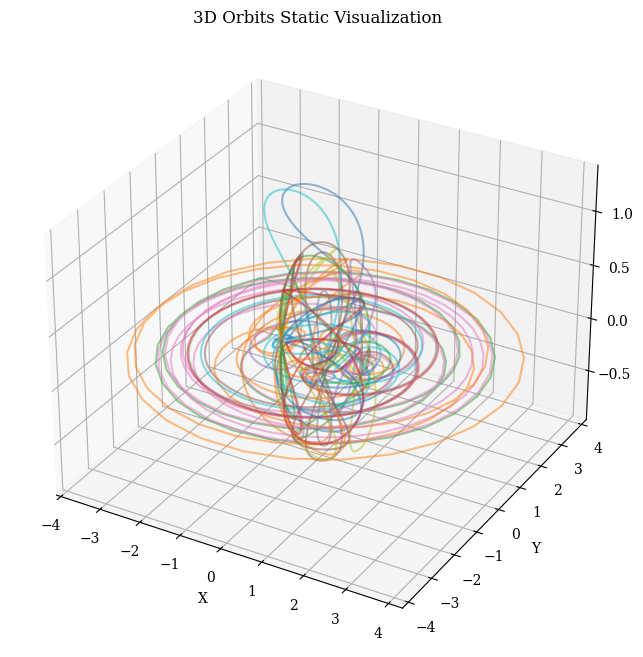

In [14]:
visualize_static_orbits(np.transpose(old_refined_orbits[:,:,1:], (0, 2, 1)), show_legend=False)